
# Part I - (Dataset Exploration Title)
## by Mina Albert Ibrahim

## Introduction

#### Dataset:
> Dataset Name: Flights dataset, this dataset used in my project from classroom

> Description: This dataset includes all air flights from 1987 to 2022, including some features such as time period , airlines ,  origins of airports , Destinations and Departure and Arrival Performances,Also it includes Cancellations and Diversions, Flight Summaries, Cause of Delay, Gate Return Information at Origin Airport and Diverted Airport Information

> Purpose: The main goal of this analysis is to understand the most repeated destinations , time periods and all airlines of planes.


## Preliminary Wrangling

#### Before importing needed packages i want to upgrade them

In [1]:
%pip install --upgrade numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns' , None)

#### Downloading compressed dataset to my workspace

In [3]:
# import requests , os

# response = requests.get('https://video.udacity-data.com/topher/2023/December/6571fb88_airline_2m.tar/airline_2m.tar.gz')
# if not os.path.exists('Csv_Files/airline_2m.tar.gz'):
#     print('Downloading the dataset file')
#     with open('Csv_Files/airline_2m.tar.gz' , 'wb') as f:
#         f.write(response.content)

# I  have commented the above code because I have already downloaded the dataset file and it take about 10 minutes to check of exsitance of the file

#### loading dataset

In [4]:
df = pd.read_csv('Csv_Files/airline_2m.tar.gz' , encoding='Latin-1' , low_memory=True)

/tmp/ipykernel_229618/2693428106.py:1: DtypeWarning: Columns (69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Csv_Files/airline_2m.tar.gz' , encoding='Latin-1' , low_memory=True)


#### Defining our dataset

In [5]:
df.info(verbose = True , show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 109 columns):
 #    Column                           Non-Null Count    Dtype  
---   ------                           --------------    -----  
 0    Year                             2000000 non-null  int64  
 1    Quarter                          2000000 non-null  int64  
 2    Month                            2000000 non-null  int64  
 3    DayofMonth                       2000000 non-null  int64  
 4    DayOfWeek                        2000000 non-null  int64  
 5    FlightDate                       2000000 non-null  object 
 6    Reporting_Airline                2000000 non-null  object 
 7    DOT_ID_Reporting_Airline         2000000 non-null  int64  
 8    IATA_CODE_Reporting_Airline      2000000 non-null  object 
 9    Tail_Number                      1608237 non-null  object 
 10   Flight_Number_Reporting_Airline  2000000 non-null  int64  
 11   OriginAirportID                  20

In [6]:
df.describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestStateFips,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,1.999354e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,1.999406e+06,2.000000e+06,2.000000e+06,1.963995e+06,1.963932e+06,1.963932e+06,1.963932e+06,1.963932e+06,1.584358e+06,1.584323e+06,1.582042e+06,1.582153e+06,2.000000e+06,1.960449e+06,1.958922e+06,1.958922e+06,1.958922e+06,1.958922e+06,2.000000e+06,2.000000e+06,1.999719e+06,1.958948e+06,1.580651e+06,2000000.0,2.000000e+06,2.000000e+06,221803.000000,221803.000000,221803.000000,221803.000000,221803.000000,4454.000000,4454.000000,4454.000000,746114.000000,1775.000000,1501.000000,1501.000000,1775.000000,1881.000000,1.881000e+03,1881.000000,1881.000000,1881.000000,1512.000000,14.000000,1.400000e+01,14.000000,14.000000,14.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2.004314e+03,2.501267e+00,6.500761e+00,1.572202e+01,3.937445e+00,1.992450e+04,1.719375e+03,1.271899e+04,1.271901e+06,3.173373e+04,2.687446e+01,5.522946e+01,1.271924e+04,1.271925e+06,3.173239e+04,2.685666e+01,5.526029e+01,1.332350e+03,1.343248e+03,8.587405e+00,1.049667e+01,1.696362e-01,6.643356e-02,1.580659e+01,1.362872e+03,1.479911e+03,6.714089e+00,1.492285e+03,1.487321e+03,6.205467e+00,1.179442e+01,1.980349e-01,-7.384521e-02,1.823100e-02,2.295000e-03,1.271275e+02,1.249893e+02,1.059533e+02,1.0,7.334963e+02,3.409396e+00,16.892580,2.939929,15.389395,0.084873,22.054170,1324.179838,36.215088,35.504490,0.003674,0.845634,351.501666,208.504997,40.184225,12697.503987,1.269753e+06,1505.026050,34.927698,28.360447,1558.488757,12846.071429,1.284610e+06,1318.142857,17.214286,15.642857,1470.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.228930e+00,1.118022e+00,3.443460e+00,8.778412e+00,1.990369e+00,3.665827e+02,1.659726e+03,1.534529e+03,1.534527e+05,1.302432e+03,1.643874e+01,2.682221e+01,1.534860e+03,1.534858e+05,1.302004e+03,1.643312e+01,2.678134e+01,4.765702e+02,4.818427e+02,3.272473e+01,3.196467e+01,3.753130e-01,1.824514e+00,1.023564e+01,4.855511e+02,5.065056e+02,7.948352e+00,4.955542e+02,5.062998e+02,3.483340e+01,3.197121e+01,3.985187e-01,1.994990e+00,1.337858e-01,4.785117e-02,7.040894e+01,7.038500e+01,6.859287e+01,0.0,5.684968e+02,2.242753e+00,46.222289,21.101110,30.538782,2.109449,41.631429,490.605125,32.909992,31.155685,0.117989,0.361401,165.854855,160.300462,145.714770,1617.893469,1.617892e+05,536.936115,34.177899,30.210587,581.816735,1366.140575,1.366139e+05,691.330474,15.126027,12.767791,660.218146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.987000e+03,1.000000e+00,1.000000e+00,1.00000

- Firstly i see many invalid dtypes and Nan values, so i will check firstly of Nan values

#### Checking of Columns that have above 30% Nan values

In [7]:
thirty_percent = df.shape[0] * 30/100
most_nulls_columns = round(df[df.columns[df.isna().sum() >= thirty_percent]].isna().sum() / df.shape[0] * 100 , 2)
most_nulls_columns

CancellationCode         98.99
CarrierDelay             88.91
WeatherDelay             88.91
NASDelay                 88.91
SecurityDelay            88.91
LateAircraftDelay        88.91
FirstDepTime             99.78
TotalAddGTime            99.78
LongestAddGTime          99.78
DivAirportLandings       62.69
DivReachedDest           99.91
DivActualElapsedTime     99.92
DivArrDelay              99.92
DivDistance              99.91
Div1Airport              99.91
Div1AirportID            99.91
Div1AirportSeqID         99.91
Div1WheelsOn             99.91
Div1TotalGTime           99.91
Div1LongestGTime         99.91
Div1WheelsOff            99.92
Div1TailNum              99.92
Div2Airport             100.00
Div2AirportID           100.00
Div2AirportSeqID        100.00
Div2WheelsOn            100.00
Div2TotalGTime          100.00
Div2LongestGTime        100.00
Div2WheelsOff           100.00
Div2TailNum             100.00
Div3Airport             100.00
Div3AirportID           100.00
Div3Airp

- Before deleting this columns we should know definition of each column

> After knowing all definations of these columns i think we should delete these columns: all columns have 100% null values

#### Firstly deleting All columns that have 100% null values

In [8]:
df.drop(most_nulls_columns[most_nulls_columns == 100].keys() , axis=1 , inplace=True)

#### Testing the results:

In [9]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 77 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             2000000 non-null  int64  
 1   Quarter                          2000000 non-null  int64  
 2   Month                            2000000 non-null  int64  
 3   DayofMonth                       2000000 non-null  int64  
 4   DayOfWeek                        2000000 non-null  int64  
 5   FlightDate                       2000000 non-null  object 
 6   Reporting_Airline                2000000 non-null  object 
 7   DOT_ID_Reporting_Airline         2000000 non-null  int64  
 8   IATA_CODE_Reporting_Airline      2000000 non-null  object 
 9   Tail_Number                      1608237 non-null  object 
 10  Flight_Number_Reporting_Airline  2000000 non-null  int64  
 11  OriginAirportID                  2000000 non-null 

#### Secondary thing: invalid datatypes:
- in the info of this dataset, Year, Month , DayOfMonth , DayOfWeek should be object datatype
- But FlightDate should be datetime datatype

In [10]:
for col in [ 'Year', 'Month' , 'DayofMonth' , 'DayOfWeek']:df[col] = df[col].astype('object')
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

#### Results:

In [11]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 77 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   Year                             2000000 non-null  object        
 1   Quarter                          2000000 non-null  int64         
 2   Month                            2000000 non-null  object        
 3   DayofMonth                       2000000 non-null  object        
 4   DayOfWeek                        2000000 non-null  object        
 5   FlightDate                       2000000 non-null  datetime64[ns]
 6   Reporting_Airline                2000000 non-null  object        
 7   DOT_ID_Reporting_Airline         2000000 non-null  int64         
 8   IATA_CODE_Reporting_Airline      2000000 non-null  object        
 9   Tail_Number                      1608237 non-null  object        
 10  Flight_Number_Reporting_Airlin

In [12]:
df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum
723988,2017,4,12,4,1,2017-12-04,NK,20416,NK,N525NK,506,13796,1379608,32457,OAK,"Oakland, CA",CA,6.0,California,91,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6.0,California,91,1345,1332.0,-13.0,0.0,0.0,-1.0,1300-1359,19.0,1351.0,1444.0,13.0,1505,1457.0,-8.0,0.0,0.0,-1.0,1500-1559,0.0,NaN,0.0,80.0,85.0,53.0,1.0,337.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110707,1998,3,8,3,1,1998-08-03,US,20355,US,N806US,708,12339,1233902,32337,IND,"Indianapolis, IN",IN,18.0,Indiana,42,12953,1295301,31703,LGA,"New York, NY",NY,36.0,New York,22,1505,1501.0,-4.0,0.0,0.0,-1.0,1500-1559,12.0,1513.0,1749.0,6.0,1758,1755.0,-3.0,0.0,0.0,-1.0,1700-1759,0.0,NaN,0.0,113.0,114.0,96.0,1.0,659.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1678132,2000,4,12,10,7,2000-12-10,AA,19805,AA,N5BPAA,1541,11298,1129802,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,14107,1410701,30466,PHX,"Phoenix, AZ",AZ,4.0,Arizona,81,1917,1920.0,3.0,3.0,0.0,0.0,1900-1959,39.0,1959.0,2116.0,4.0,2055,2120.0,25.0,25.0,1.0,1.0,2000-2059,0.0,NaN,0.0,158.0,180.0,137.0,1.0,868.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83248,2004,3,7,14,3,2004-07-14,HP,19991,HP,N664AW,234,14107,1410701,30466,PHX,"Phoenix, AZ",AZ,4.0,Arizona,81,11433,1143301,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43,1509,1514.0,5.0,5.0,0.0,0.0,1500-1559,9.0,1523.0,2153.0,7.0,2159,2200.0,1.0,1.0,0.0,0.0,2100-2159,0.0,NaN,0.0,230.0,226.0,210.0,1.0,1671.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513835,2012,2,4,9,1,2012-04-09,EV,20366,EV,N824AS,5102,13277,1327702,33277,MGM,"Montgomery, AL",AL,1.0,Alabama,51,10397,1039704,30397,ATL,"Atlanta, GA",GA,13.0,Georgia,34,1325,1321.0,-4.0,0.0,0.0,-1.0,1300-1359,6.0,1327.0,1454.0,14.0,1527,1508.0,-19.0,0.0,0.0,-2.0,1500-1559,0.0,NaN,0.0,62.0,47.0,27.0,1.0,147.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Converting Quarters column codes to periods
- In dataset documantation Quarters column have four unique values (1,2,3,4)
> 1:January 1-March 31 , 2:April 1-June 30 , 3:July 1-September 30 and 4:October 1-December 31
- So i want to convert this codes to periods to be eassy to read

In [13]:
# Converting Codes to periods
codes_to_periods = {1:'January 1-March 31' , 2:'April 1-June 30' , 3:'July 1-September 30' , 4:'October 1-December 31'}
df['Quarter'].replace(codes_to_periods , inplace=True)

/tmp/ipykernel_229618/671311903.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quarter'].replace(codes_to_periods , inplace=True)


In [14]:
df['Quarter'].unique()

array(['January 1-March 31', 'April 1-June 30', 'July 1-September 30',
       'October 1-December 31'], dtype=object)

- Perfect!

In [15]:
# Testing
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 77 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   Year                             2000000 non-null  object        
 1   Quarter                          2000000 non-null  object        
 2   Month                            2000000 non-null  object        
 3   DayofMonth                       2000000 non-null  object        
 4   DayOfWeek                        2000000 non-null  object        
 5   FlightDate                       2000000 non-null  datetime64[ns]
 6   Reporting_Airline                2000000 non-null  object        
 7   DOT_ID_Reporting_Airline         2000000 non-null  int64         
 8   IATA_CODE_Reporting_Airline      2000000 non-null  object        
 9   Tail_Number                      1608237 non-null  object        
 10  Flight_Number_Reporting_Airlin

In [16]:
df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum
1280296,1989,October 1-December 31,12,8,5,1989-12-08,NW,19386,NW,NaN,704,13487,1348701,31650,MSP,"Minneapolis, MN",MN,27.0,Minnesota,63,12339,1233902,32337,IND,"Indianapolis, IN",IN,18.0,Indiana,42,2035,2033.0,-2.0,0.0,0.0,-1.0,2000-2059,NaN,NaN,NaN,NaN,2258,2246.0,-12.0,0.0,0.0,-1.0,2200-2259,0.0,NaN,0.0,83.0,73.0,NaN,1.0,503.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1261734,2019,October 1-December 31,12,17,2,2019-12-17,YV,20378,YV,N934FJ,5802,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4.0,Arizona,81,11638,1163807,31638,FAT,"Fresno, CA",CA,6.0,California,91,832,842.0,10.0,10.0,0.0,0.0,0800-0859,19.0,901.0,919.0,4.0,919,923.0,4.0,4.0,0.0,0.0,0900-0959,0.0,NaN,0.0,107.0,101.0,78.0,1.0,493.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013481,2019,April 1-June 30,5,29,3,2019-05-29,NK,20416,NK,N635NK,122,14492,1449202,34492,RDU,"Raleigh/Durham, NC",NC,37.0,North Carolina,36,13495,1349505,33495,MSY,"New Orleans, LA",LA,22.0,Louisiana,72,710,718.0,8.0,8.0,0.0,0.0,0700-0759,18.0,736.0,828.0,5.0,829,833.0,4.0,4.0,0.0,0.0,0800-0859,0.0,NaN,0.0,139.0,135.0,112.0,1.0,779.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1207381,2002,April 1-June 30,6,29,6,2002-06-29,AA,19805,AA,N5TEAA,2777,11298,1129802,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,12892,1289201,32575,LAX,"Los Angeles, CA",CA,6.0,California,91,1920,1920.0,0.0,0.0,0.0,0.0,1900-1959,22.0,1942.0,2013.0,4.0,2030,2017.0,-13.0,0.0,0.0,-1.0,2000-2059,0.0,NaN,0.0,190.0,177.0,151.0,1.0,1235.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009483,2019,April 1-June 30,5,25,6,2019-05-25,WN,19393,WN,N468WN,3356,13891,1389101,32575,ONT,"Ontario, CA",CA,6.0,California,91,13796,1379608,32457,OAK,"Oakland, CA",CA,6.0,California,91,810,802.0,-8.0,0.0,0.0,-1.0,0800-0859,7.0,809.0,903.0,4.0,925,907.0,-18.0,0.0,0.0,-2.0,0900-0959,0.0,NaN,0.0,75.0,65.0,54.0,1.0,362.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Reporting_Airline column:
- This column also has codes like "Quarter" column and this means these codes are in the dataset documentation so I should fix that to be also easy to read,
- Now I will get this codes results from documentation to Reporting_Airline_Results.csv.

In [17]:
df['Reporting_Airline'].unique()

array(['NW', 'FL', 'MQ', 'DL', 'US', 'CO', '9E', 'YV', 'WN', 'AA', 'OO',
       'UA', 'PI', 'AS', 'EV', 'YX', 'OH', 'HP', 'TW', 'DH', 'B6', 'HA',
       'XE', 'NK', 'F9', 'PS', 'EA', 'G4', 'VX', 'TZ', 'KH', 'PA (1)',
       'ML (1)'], dtype=object)

In [18]:
reporting_codes_df = pd.read_csv('Csv_Files/Reporting_Airline_Results.tsv' , sep='\t')
reporting_codes_df

,Code,Description
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,CO,Continental Air Lines Inc.
5,DH,Independence Air
6,DL,Delta Air Lines Inc.
7,EA,Eastern Air Lines Inc.
8,EV,ExpressJet Airlines LLC d/b/a aha!
9,F9,Frontier Airlines Inc.


- Ok let's extarct description column values to reporting airline column

In [19]:
#Converting codes to their description
df['Reporting_Airline'].replace(reporting_codes_df['Code'].to_list() , reporting_codes_df['Description'].to_list() , inplace=True)

/tmp/ipykernel_229618/1901221718.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Reporting_Airline'].replace(reporting_codes_df['Code'].to_list() , reporting_codes_df['Description'].to_list() , inplace=True)


In [20]:
#Results
df['Reporting_Airline'].unique()

array(['Northwest Airlines Inc.', 'AirTran Airways Corporation',
       'Envoy Air', 'Delta Air Lines Inc.', 'US Airways Inc.',
       'Continental Air Lines Inc.', 'Endeavor Air Inc.',
       'Mesa Airlines Inc.', 'Southwest Airlines Co.',
       'American Airlines Inc.', 'SkyWest Airlines Inc.',
       'United Air Lines Inc.', 'Piedmont Aviation Inc.',
       'Alaska Airlines Inc.', 'ExpressJet Airlines LLC d/b/a aha!',
       'Republic Airline', 'PSA Airlines Inc.',
       'America West Airlines Inc. (Merged with US Airways 9/05. Stopped reporting 10/07.)',
       'Trans World Airways LLC', 'Independence Air', 'JetBlue Airways',
       'Hawaiian Airlines Inc.', 'ExpressJet Airlines Inc.',
       'Spirit Air Lines', 'Frontier Airlines Inc.',
       'Ukraine International Airlines', 'Eastern Air Lines Inc.',
       'Allegiant Air', 'Virgin America', 'ATA Airlines d/b/a ATA',
       'Aloha Air Cargo', 'Pan American World Airways (1)',
       'Midway Airlines Inc. (1)'], dtype=object)

In [21]:
df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum
46496,2019,April 1-June 30,5,24,5,2019-05-24,SkyWest Airlines Inc.,20304,OO,N905SW,5074,15454,1545405,35454,UIN,"Quincy, IL",IL,17.0,Illinois,41,13930,1393007,30977,ORD,"Chicago, IL",IL,17.0,Illinois,41,800,816.0,16.0,16.0,1.0,1.0,0800-0859,5.0,821.0,859.0,9.0,920,908.0,-12.0,0.0,0.0,-1.0,0900-0959,0.0,NaN,0.0,80.0,52.0,38.0,1.0,222.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928186,1999,January 1-March 31,1,13,3,1999-01-13,US Airways Inc.,20355,US,N577US,22,12892,1289201,32575,LAX,"Los Angeles, CA",CA,6.0,California,91,14100,1410001,34100,PHL,"Philadelphia, PA",PA,42.0,Pennsylvania,23,2200,2201.0,1.0,1.0,0.0,0.0,2200-2259,14.0,2215.0,618.0,6.0,557,624.0,27.0,27.0,1.0,1.0,0001-0559,0.0,NaN,0.0,297.0,323.0,303.0,1.0,2401.0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528117,1999,July 1-September 30,9,22,3,1999-09-22,Delta Air Lines Inc.,19790,DL,N243WA,2448,13204,1320401,31454,MCO,"Orlando, FL",FL,12.0,Florida,33,12264,1226401,30852,IAD,"Washington, DC",VA,51.0,Virginia,38,2145,2142.0,-3.0,0.0,0.0,-1.0,2100-2159,10.0,2152.0,2331.0,6.0,2355,2337.0,-18.0,0.0,0.0,-2.0,2300-2359,0.0,NaN,0.0,130.0,115.0,99.0,1.0,758.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1551827,2019,April 1-June 30,5,11,6,2019-05-11,American Airlines Inc.,19805,AA,N199UW,1487,12478,1247805,31703,JFK,"New York, NY",NY,36.0,New York,22,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4.0,Arizona,81,640,637.0,-3.0,0.0,0.0,-1.0,0600-0659,19.0,656.0,915.0,7.0,915,922.0,7.0,7.0,0.0,0.0,0900-0959,0.0,NaN,0.0,335.0,345.0,319.0,1.0,2153.0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1319115,2011,October 1-December 31,11,20,7,2011-11-20,Envoy Air,20398,MQ,N636MQ,4009,14122,1412202,30198,PIT,"Pittsburgh, PA",PA,42.0,Pennsylvania,23,13930,1393002,30977,ORD,"Chicago, IL",IL,17.0,Illinois,41,1900,1912.0,12.0,12.0,0.0,0.0,1900-1959,9.0,1921.0,1938.0,8.0,1955,1946.0,-9.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,115.0,94.0,77.0,1.0,413.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 77 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   Year                             2000000 non-null  object        
 1   Quarter                          2000000 non-null  object        
 2   Month                            2000000 non-null  object        
 3   DayofMonth                       2000000 non-null  object        
 4   DayOfWeek                        2000000 non-null  object        
 5   FlightDate                       2000000 non-null  datetime64[ns]
 6   Reporting_Airline                2000000 non-null  object        
 7   DOT_ID_Reporting_Airline         2000000 non-null  int64         
 8   IATA_CODE_Reporting_Airline      2000000 non-null  object        
 9   Tail_Number                      1608237 non-null  object        
 10  Flight_Number_Reporting_Airlin

### Departure times:

In [23]:
#Now I want to look at Departure times
Dep_columns = [col for col in df.columns if col.startswith('Dep')]
Dep_columns.append('CRSDepTime')
df[Dep_columns].sample(5)

,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,CRSDepTime
1852872,714.0,-1.0,0.0,0.0,-1.0,0700-0759,715
48608,632.0,-5.0,0.0,0.0,-1.0,0600-0659,637
1253175,1730.0,0.0,0.0,0.0,0.0,1700-1759,1730
274783,1645.0,0.0,0.0,0.0,0.0,1600-1659,1645
807037,2028.0,53.0,53.0,1.0,3.0,1900-1959,1935


- DepTime and CSRDepTime should be like this (hh:mm) also DepTimeBlk should be hh:mm-hh:mm
> DepTimeBlk is Departure Time Block

In [24]:
for col in ['DepTime' , 'CRSDepTime']:
    # Step 1 Changing DepTime and CSRDepTIme format:
    #Converting numbers to  integers, then to objects, and making all values have 4 digits
    df[col] = df[col].fillna('NaN').astype(str).str.replace('.0', '', regex=True).str.zfill(4) 
    # In this script handling 'Nan to Nan , converting datatype to string , remove '.0' and make all values have 4 digit
    # Step 2 Changing Datatype:
    df[col] =pd.to_datetime(df[col], format='%H%M' , errors='coerce').dt.strftime('%H:%M')

In [25]:
df[['DepTime', 'CRSDepTime']].sample(5)

,DepTime,CRSDepTime
694251,06:25,00:06
1236657,21:17,00:21
305235,11:34,11:35
1189040,12:15,12:13
1763463,17:34,17:35


> Ok that's cool let's do the same thing in Dep Time Block

In [26]:
df['DepTimeBlk'].sample(5)

1639978    1400-1459
1481318    1100-1159
1881590    0600-0659
607474     1500-1559
1122822    1400-1459
Name: DepTimeBlk, dtype: object

In [27]:
# Step 1 Making temp column to set from and to times in list
df['Temp']= df['DepTimeBlk'].str.split('-')

In [28]:
# Changing from and to times formats
df['from']=pd.to_datetime(df['Temp'].str[0] , format='%H%M' , errors='coerce').dt.strftime('%H:%M')
df['from']

0          16:00
1          12:00
2          16:00
3          13:00
4          18:00
           ...  
1999995    14:00
1999996    09:00
1999997    12:00
1999998    18:00
1999999    16:00
Name: from, Length: 2000000, dtype: object

In [29]:
df['to']=pd.to_datetime(df['Temp'].str[1] , format='%H%M' , errors='coerce').dt.strftime('%H:%M')
df['to']

0          16:59
1          12:59
2          16:59
3          13:59
4          18:59
           ...  
1999995    14:59
1999996    09:59
1999997    12:59
1999998    18:59
1999999    16:59
Name: to, Length: 2000000, dtype: object

In [30]:
# Step 3 merging them to DepTimeBlk
df['DepTimeBlk'] = df['from']+'-'+df['to']

In [31]:
df['DepTimeBlk']

0          16:00-16:59
1          12:00-12:59
2          16:00-16:59
3          13:00-13:59
4          18:00-18:59
              ...     
1999995    14:00-14:59
1999996    09:00-09:59
1999997    12:00-12:59
1999998    18:00-18:59
1999999    16:00-16:59
Name: DepTimeBlk, Length: 2000000, dtype: object

- very good

In [32]:
df.drop(['Temp' , 'to' , 'from'] , axis =1 , inplace= True) # droping temporary columns

In [33]:
df[Dep_columns].sample(5)

,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,CRSDepTime
1855307,15:41,1.0,1.0,0.0,0.0,15:00-15:59,00:15
536545,17:11,56.0,56.0,1.0,3.0,16:00-16:59,16:15
1143582,00:10,-5.0,0.0,0.0,-1.0,16:00-16:59,00:15
173038,00:06,99.0,99.0,1.0,6.0,08:00-08:59,08:27
623894,16:47,2.0,2.0,0.0,0.0,16:00-16:59,16:45


In [34]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum
0,1998,January 1-March 31,1,2,5,1998-01-02,Northwest Airlines Inc.,19386,NW,N297US,675,13487,1348701,31650,MSP,"Minneapolis, MN",MN,27.0,Minnesota,63,14869,1486902,34614,SLC,"Salt Lake City, UT",UT,49.0,Utah,87,00:16,16:59,19.0,19.0,1.0,1.0,16:00-16:59,24.0,1723.0,1856.0,3.0,1836,1859.0,23.0,23.0,1.0,1.0,1800-1859,0.0,NaN,0.0,176.0,180.0,153.0,1.0,991.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,April 1-June 30,5,28,4,2009-05-28,AirTran Airways Corporation,20437,FL,N946AT,671,13342,1334202,33342,MKE,"Milwaukee, WI",WI,55.0,Wisconsin,45,13204,1320401,31454,MCO,"Orlando, FL",FL,12.0,Florida,33,00:14,00:12,-2.0,0.0,0.0,-1.0,12:00-12:59,10.0,1212.0,1533.0,8.0,1541,1541.0,0.0,0.0,0.0,0.0,1500-1559,0.0,NaN,0.0,157.0,159.0,141.0,1.0,1066.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,April 1-June 30,6,29,6,2013-06-29,Envoy Air,20398,MQ,N665MQ,3297,11921,1192102,31921,GJT,"Grand Junction, CO",CO,8.0,Colorado,82,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,00:16,16:44,14.0,14.0,0.0,0.0,16:00-16:59,9.0,1653.0,1936.0,6.0,1945,1942.0,-3.0,0.0,0.0,-1.0,1900-1959,0.0,NaN,0.0,135.0,118.0,103.0,1.0,773.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,July 1-September 30,8,31,2,2010-08-31,Delta Air Lines Inc.,19790,DL,N6705Y,1806,12892,1289201,32575,LAX,"Los Angeles, CA",CA,6.0,California,91,11433,1143301,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43,00:15,00:15,0.0,0.0,0.0,0.0,13:00-13:59,23.0,1328.0,2008.0,7.0,2035,2015.0,-20.0,0.0,0.0,-2.0,2000-2059,0.0,NaN,0.0,270.0,250.0,220.0,1.0,1979.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,January 1-March 31,1,15,7,2006-01-15,US Airways Inc.,20355,US,N504AU,465,11618,1161801,31703,EWR,"Newark, NJ",NJ,34.0,New Jersey,21,11057,1105702,31057,CLT,"Charlotte, NC",NC,37.0,North Carolina,36,00:18,19:11,51.0,51.0,1.0,3.0,18:00-18:59,19.0,1930.0,2050.0,8.0,2026,2058.0,32.0,32.0,1.0,2.0,2000-2059,0.0,NaN,0.0,126.0,107.0,80.0,1.0,529.0,3,0.0,0.0,0.0,0.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 77 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   Year                             2000000 non-null  object        
 1   Quarter                          2000000 non-null  object        
 2   Month                            2000000 non-null  object        
 3   DayofMonth                       2000000 non-null  object        
 4   DayOfWeek                        2000000 non-null  object        
 5   FlightDate                       2000000 non-null  datetime64[ns]
 6   Reporting_Airline                2000000 non-null  object        
 7   DOT_ID_Reporting_Airline         2000000 non-null  int64         
 8   IATA_CODE_Reporting_Airline      2000000 non-null  object        
 9   Tail_Number                      1608237 non-null  object        
 10  Flight_Number_Reporting_Airlin

- I want to check origin if it clear or not

In [36]:
df.Origin.unique()

array(['MSP', 'MKE', 'GJT', 'LAX', 'EWR', 'DFW', 'BOS', 'ATL', 'ORD',
       'MDW', 'SAN', 'ELP', 'SJU', 'ABQ', 'GSO', 'DTW', 'SLC', 'SMF',
       'MSY', 'SGF', 'IND', 'PHX', 'BUR', 'DCA', 'CAE', 'RDU', 'JAX',
       'CHO', 'JFK', 'DEN', 'MCI', 'HNL', 'SEA', 'PIT', 'OGG', 'AUS',
       'STL', 'LNK', 'DAY', 'MEM', 'MIA', 'CLT', 'SFO', 'RIC', 'TPA',
       'TUL', 'SDF', 'DSM', 'OXR', 'PHL', 'CLE', 'DAL', 'SJC', 'RSW',
       'OMA', 'MCO', 'BDL', 'SNA', 'LBB', 'BWI', 'HLN', 'FLL', 'IAH',
       'GEG', 'PDX', 'TUS', 'AZO', 'MFE', 'LAS', 'SYR', 'LGA', 'BTR',
       'AMA', 'IAD', 'HOB', 'OKC', 'SAT', 'LEX', 'HOU', 'FCA', 'ABI',
       'MSO', 'PVD', 'GSP', 'BHM', 'GRB', 'OAK', 'BZN', 'COS', 'MSN',
       'EUG', 'MGM', 'BNA', 'ORF', 'ANC', 'RNO', 'PWM', 'SFB', 'MBS',
       'CMH', 'LIH', 'LGB', 'CVG', 'CID', 'CAK', 'ALB', 'FNT', 'FSD',
       'XNA', 'CWA', 'ITO', 'PIA', 'LIT', 'ROA', 'OAJ', 'MDT', 'HSV',
       'AGS', 'PBI', 'BUF', 'MTJ', 'TLH', 'CRP', 'ONT', 'ISP', 'BTV',
       'RDM', 'CRW',

> Ok now i think shortcuts not readable so i'll replace this shortcuts with the full origin name

In [37]:
df['Origin'].head()

0    MSP
1    MKE
2    GJT
3    LAX
4    EWR
Name: Origin, dtype: object

In [38]:
# load origin results from the website
fullOrigin = pd.read_csv('Csv_Files/OnewayT_ONTIME_REPORTING2024.tsv' , sep='\t')

- We can split origin values from (: ) between city name and airport name

In [39]:
fullOrigin.head()

,Code,Description,PCT_ONTIME_DEP
0,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",82.80
1,ABI,"Abilene, TX: Abilene Regional",83.31
2,ABQ,"Albuquerque, NM: Albuquerque International Sun...",81.63
3,ABR,"Aberdeen, SD: Aberdeen Regional",83.68
4,ABY,"Albany, GA: Southwest Georgia Regional",81.08


In [40]:
fullOrigin.columns

Index(['Code', 'Description', 'PCT_ONTIME_DEP'], dtype='object')

In [41]:
fullOrigin['Description'][:10].to_list()

['Allentown/Bethlehem/Easton, PA: Lehigh Valley International',
 'Abilene, TX: Abilene Regional',
 'Albuquerque, NM: Albuquerque International Sunport',
 'Aberdeen, SD: Aberdeen Regional',
 'Albany, GA: Southwest Georgia Regional',
 'Nantucket, MA: Nantucket Memorial',
 'Waco, TX: Waco Regional',
 'Arcata/Eureka, CA: California Redwood Coast Humboldt County',
 'Atlantic City, NJ: Atlantic City International',
 'Adak Island, AK: Adak']

In [42]:
# replace shortcuts with description
df['Origin'].replace(fullOrigin['Code'].to_list(), fullOrigin['Description'].to_list() , inplace = True)

/tmp/ipykernel_229618/2130603950.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Origin'].replace(fullOrigin['Code'].to_list(), fullOrigin['Description'].to_list() , inplace = True)


In [43]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 77 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   Year                             2000000 non-null  object        
 1   Quarter                          2000000 non-null  object        
 2   Month                            2000000 non-null  object        
 3   DayofMonth                       2000000 non-null  object        
 4   DayOfWeek                        2000000 non-null  object        
 5   FlightDate                       2000000 non-null  datetime64[ns]
 6   Reporting_Airline                2000000 non-null  object        
 7   DOT_ID_Reporting_Airline         2000000 non-null  int64         
 8   IATA_CODE_Reporting_Airline      2000000 non-null  object        
 9   Tail_Number                      1608237 non-null  object        
 10  Flight_Number_Reporting_Airlin

In [44]:
df['Origin'].head()

0                                            MSP
1                                            MKE
2    Grand Junction, CO: Grand Junction Regional
3     Los Angeles, CA: Los Angeles International
4       Newark, NJ: Newark Liberty International
Name: Origin, dtype: object

In [45]:
df['Origin'].unique()

array(['MSP', 'MKE', 'Grand Junction, CO: Grand Junction Regional',
       'Los Angeles, CA: Los Angeles International',
       'Newark, NJ: Newark Liberty International',
       'Dallas/Fort Worth, TX: Dallas/Fort Worth International',
       'Boston, MA: Logan International',
       'Atlanta, GA: Hartsfield-Jackson Atlanta International', 'ORD',
       'MDW', 'SAN', 'El Paso, TX: El Paso International', 'SJU',
       'Albuquerque, NM: Albuquerque International Sunport',
       'Greensboro/High Point, NC: Piedmont Triad International',
       'Detroit, MI: Detroit Metro Wayne County', 'SLC', 'SMF', 'MSY',
       'SGF', 'Indianapolis, IN: Indianapolis International', 'PHX',
       'Burbank, CA: Bob Hope',
       'Washington, DC: Ronald Reagan Washington National',
       'Columbia, SC: Columbia Metropolitan', 'RDU',
       'Jacksonville, FL: Jacksonville International',
       'Charlottesville, VA: Charlottesville Albemarle',
       'New York, NY: John F. Kennedy International',
      

- That's pretty good, almost of them are converted

> Now let's take a look on city names

In [46]:
df['OriginCityName'].head()

0       Minneapolis, MN
1         Milwaukee, WI
2    Grand Junction, CO
3       Los Angeles, CA
4            Newark, NJ
Name: OriginCityName, dtype: object

- I have pretty idea:
> Extracting airport name from origin

In [47]:
# let's split orgin column and create Airport column
df['Airport'] = df['Origin'].str.split(': ').str[1]

In [48]:
# let's see results
df['Airport'].head()

0                             NaN
1                             NaN
2         Grand Junction Regional
3       Los Angeles International
4    Newark Liberty International
Name: Airport, dtype: object

- Ok i will check if dep delay indicator is correct or not 

In [49]:
df[df['DepDelayMinutes'] > 15]['DepDel15'].unique()

array([1.])

In [50]:
df[df['DepDelayMinutes'] < 15]['DepDel15'].unique()

array([0.])

- ok thats good let's convert 0 , 1 to no and yes

In [51]:
df['DepDel15'].replace(1.0 , 'Yes' , inplace =True)
df['DepDel15'].replace(0 , 'No' , inplace=True)

/tmp/ipykernel_229618/417198125.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DepDel15'].replace(1.0 , 'Yes' , inplace =True)


In [52]:
df['DepDel15'].unique()

array(['Yes', 'No', nan], dtype=object)

- Ok that's more readable

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 78 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Year                             object        
 1   Quarter                          object        
 2   Month                            object        
 3   DayofMonth                       object        
 4   DayOfWeek                        object        
 5   FlightDate                       datetime64[ns]
 6   Reporting_Airline                object        
 7   DOT_ID_Reporting_Airline         int64         
 8   IATA_CODE_Reporting_Airline      object        
 9   Tail_Number                      object        
 10  Flight_Number_Reporting_Airline  int64         
 11  OriginAirportID                  int64         
 12  OriginAirportSeqID               int64         
 13  OriginCityMarketID               int64         
 14  Origin                           o

In [54]:
df['DepartureDelayGroups'].unique()

array([ 1., -1.,  0.,  3., 12., nan,  2.,  8.,  5.,  7., 10.,  4.,  9.,
        6., 11., -2.])

- This code means period of delay (-15 , -15 to -1 , 0 ,14 , ...)
> let's make it more readable

In [55]:
# load results data for delay groups
delay_and_arrival_groups_df = pd.read_csv('Csv_Files/L_ONTIME_DELAY_GROUPS.csv')

In [56]:
delay_and_arrival_groups_df.head()

,Code,Description
0,-2,Delay < -15 minutes
1,-1,Delay between -15 and -1 minutes
2,0,Delay between 0 and 14 minutes
3,1,Delay between 15 to 29 minutes
4,2,Delay between 30 to 44 minutes


In [57]:
df['DepartureDelayGroups'].replace(delay_and_arrival_groups_df['Code'].to_list() , delay_and_arrival_groups_df['Description'].to_list(), inplace=True)

/tmp/ipykernel_229618/1844776075.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DepartureDelayGroups'].replace(delay_and_arrival_groups_df['Code'].to_list() , delay_and_arrival_groups_df['Description'].to_list(), inplace=True)


In [58]:
df['DepartureDelayGroups'].unique()

array(['Delay between 15 to 29 minutes',
       'Delay between -15 and -1 minutes',
       'Delay between 0 and 14 minutes', 'Delay between 45 to 59 minutes',
       'Delay >= 180 minutes', nan, 'Delay between 30 to 44 minutes',
       'Delay between 120 to 134 minutes',
       'Delay between 75 to 89 minutes',
       'Delay between 105 to 119 minutes',
       'Delay between 150 to 164 minutes',
       'Delay between 60 to 74 minutes',
       'Delay between 135 to 149 minutes',
       'Delay between 90 to 104 minutes',
       'Delay between 165 to 179 minutes', 'Delay < -15 minutes'],
      dtype=object)

- very good

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 78 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Year                             object        
 1   Quarter                          object        
 2   Month                            object        
 3   DayofMonth                       object        
 4   DayOfWeek                        object        
 5   FlightDate                       datetime64[ns]
 6   Reporting_Airline                object        
 7   DOT_ID_Reporting_Airline         int64         
 8   IATA_CODE_Reporting_Airline      object        
 9   Tail_Number                      object        
 10  Flight_Number_Reporting_Airline  int64         
 11  OriginAirportID                  int64         
 12  OriginAirportSeqID               int64         
 13  OriginCityMarketID               int64         
 14  Origin                           o

In [60]:
df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Airport
1357796,2018,April 1-June 30,4,25,3,2018-04-25,Delta Air Lines Inc.,19790,DL,N335NW,2279,12478,1247805,31703,"New York, NY: John F. Kennedy International","New York, NY",NY,36.0,New York,22,10397,1039707,30397,ATL,"Atlanta, GA",GA,13.0,Georgia,34,00:35,00:21,146.0,146.0,Yes,Delay between 135 to 149 minutes,20:00-20:59,30.0,2331.0,124.0,7.0,2315,131.0,136.0,136.0,1.0,9.0,2300-2359,0.0,NaN,0.0,160.0,150.0,113.0,1.0,760.0,4,0.0,0.0,136.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,John F. Kennedy International
1135714,2003,April 1-June 30,5,6,2,2003-05-06,ExpressJet Airlines LLC d/b/a aha!,20366,EV,N282AS,4816,11298,1129802,30194,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...","Dallas/Fort Worth, TX",TX,48.0,Texas,74,15370,1537001,34653,TUL,"Tulsa, OK",OK,40.0,Oklahoma,73,19:35,00:05,30.0,30.0,Yes,Delay between 30 to 44 minutes,19:00-19:59,15.0,2020.0,2130.0,4.0,2055,2134.0,39.0,39.0,1.0,2.0,2000-2059,0.0,NaN,0.0,80.0,89.0,70.0,1.0,237.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dallas/Fort Worth International
1293495,1995,January 1-March 31,1,11,3,1995-01-11,United Air Lines Inc.,19977,UA,N364UA,2345,14771,1477101,32457,SFO,"San Francisco, CA",CA,6.0,California,91,14679,1467902,33570,SAN,"San Diego, CA",CA,6.0,California,91,00:13,13:52,22.0,22.0,Yes,Delay between 15 to 29 minutes,13:00-13:59,25.0,1417.0,1518.0,2.0,1500,1520.0,20.0,20.0,1.0,1.0,1500-1559,0.0,NaN,0.0,90.0,88.0,61.0,1.0,447.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740740,2007,April 1-June 30,5,10,4,2007-05-10,United Air Lines Inc.,19977,UA,N821UA,930,12892,1289201,32575,"Los Angeles, CA: Los Angeles International","Los Angeles, CA",CA,6.0,California,91,14771,1477101,32457,SFO,"San Francisco, CA",CA,6.0,California,91,00:00,11:41,101.0,101.0,Yes,Delay between 90 to 104 minutes,10:00-10:59,21.0,1202.0,1253.0,5.0,1120,1258.0,98.0,98.0,1.0,6.0,1100-1159,0.0,NaN,0.0,80.0,77.0,51.0,1.0,337.0,2,0.0,0.0,98.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles International
1317038,1991,January 1-March 31,3,28,4,1991-03-28,Northwest Airlines Inc.,19386,NW,NaN,878,13495,1349501,33495,MSY,"New Orleans, LA",LA,22.0,Louisiana,72,13244,1324401,33244,MEM,"Memphis, TN",TN,47.0,Tennessee,54,00:07,07:27,-3.0,0.0,No,Delay between -15 and -1 minutes,07:00-07:59,NaN,NaN,NaN,NaN,841,834.0,-7.0,0.0,0.0,-1.0,0800-0859,0.0,NaN,0.0,71.0,67.0,NaN,1.0,349.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Ok wheel out time and wheel in time formats are invalid (1453.0) and there are some columns have the problem so I will make function to solve this problem

In [61]:
def fix_time_format(columns):
    """Converting time format to HH:MM to fix this format (1463.0)"""
    # results_df = pd.DataFrame()
    for col in columns:
        col_values = df[col].fillna('NaN').astype(str).str.replace('.0'
                                                                   , '', regex=True).str.zfill(4) # removing .0 and make all values are 4 characters HH:MM
        # Replace col_values to our column to apply changes on it
        df[col]=pd.to_datetime(col_values, format='%H%M' 
                                  , errors='coerce').dt.strftime('%H:%M')# Making this to avoid NaN values to be like this 0NaN instead of NaN os it will convert it to Nat
        # results_df[col] = col_values
    # return results_df

In [62]:
# Testing:
fix_time_format([
    'WheelsOff','WheelsOn'
    ,'CRSArrTime','ArrTime'
])

- That's very good let's apply changes so i will comment results dataframe

In [63]:
# Applying the function
fix_time_format([
    'WheelsOff','WheelsOn'
    ,'CRSArrTime','ArrTime'
])

In [64]:
# Checking if the function applied correctly
df[['WheelsOff','WheelsOn','CRSArrTime','ArrTime']].sample(5)

,WheelsOff,WheelsOn,CRSArrTime,ArrTime
1411744,NaN,NaN,NaN,NaN
1667606,NaN,NaN,NaN,NaN
550897,00:00,NaN,NaN,NaN
888981,NaN,NaN,NaN,NaN
249317,NaN,NaN,NaN,NaN


- That's very good

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 78 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Year                             object        
 1   Quarter                          object        
 2   Month                            object        
 3   DayofMonth                       object        
 4   DayOfWeek                        object        
 5   FlightDate                       datetime64[ns]
 6   Reporting_Airline                object        
 7   DOT_ID_Reporting_Airline         int64         
 8   IATA_CODE_Reporting_Airline      object        
 9   Tail_Number                      object        
 10  Flight_Number_Reporting_Airline  int64         
 11  OriginAirportID                  int64         
 12  OriginAirportSeqID               int64         
 13  OriginCityMarketID               int64         
 14  Origin                           o

In [66]:
df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Airport
1639477,1997,January 1-March 31,1,22,3,1997-01-22,Delta Air Lines Inc.,19790,DL,N2829W,1938,14057,1405701,34057,PDX,"Portland, OR",OR,41.0,Oregon,92,14869,1486902,34614,SLC,"Salt Lake City, UT",UT,49.0,Utah,87,18:25,18:25,0.0,0.0,No,Delay between 0 and 14 minutes,18:00-18:59,8.0,NaN,NaN,13.0,NaN,NaN,8.0,8.0,0.0,0.0,2100-2159,0.0,NaN,0.0,95.0,103.0,82.0,1.0,630.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
542228,1992,January 1-March 31,2,24,1,1992-02-24,US Airways Inc.,20355,US,NaN,110,14122,1412201,30198,PIT,"Pittsburgh, PA",PA,42.0,Pennsylvania,23,11292,1129201,30325,DEN,"Denver, CO",CO,8.0,Colorado,82,00:25,00:38,13.0,13.0,No,Delay between 0 and 14 minutes,20:00-20:59,NaN,NaN,NaN,NaN,NaN,NaN,32.0,32.0,1.0,2.0,2200-2259,0.0,NaN,0.0,215.0,234.0,NaN,1.0,1302.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19023,2005,April 1-June 30,5,15,7,2005-05-15,PSA Airlines Inc.,20417,OH,N779CA,5711,10577,1057701,30577,"Binghamton, NY: Greater Binghamton/Edwin A. Li...","Binghamton, NY",NY,36.0,New York,22,11193,1119301,33105,CVG,"Cincinnati, OH",KY,21.0,Kentucky,52,13:42,13:32,-10.0,0.0,No,Delay between -15 and -1 minutes,13:00-13:59,16.0,NaN,NaN,4.0,NaN,NaN,13.0,13.0,0.0,0.0,1500-1559,0.0,NaN,0.0,100.0,123.0,103.0,1.0,506.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Greater Binghamton/Edwin A. Link Field
96175,1994,October 1-December 31,12,14,3,1994-12-14,Southwest Airlines Co.,19393,WN,NaN,310,10800,1080001,32575,"Burbank, CA: Bob Hope","Burbank, CA",CA,6.0,California,91,14831,1483101,32457,SJC,"San Jose, CA",CA,6.0,California,91,11:15,11:15,0.0,0.0,No,Delay between 0 and 14 minutes,11:00-11:59,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,0.0,0.0,1200-1259,0.0,NaN,0.0,60.0,74.0,NaN,1.0,297.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bob Hope
1602893,2019,April 1-June 30,5,10,5,2019-05-10,United Air Lines Inc.,19977,UA,N457UA,452,11292,1129202,30325,"Denver, CO: Denver International","Denver, CO",CO,8.0,Colorado,82,11193,1119302,33105,CVG,"Cincinnati, OH",KY,21.0,Kentucky,52,00:19,11:48,39.0,39.0,Yes,Delay between 30 to 44 minutes,11:00-11:59,12.0,NaN,NaN,6.0,NaN,NaN,13.0,13.0,0.0,0.0,1500-1559,0.0,NaN,0.0,168.0,142.0,124.0,1.0,1069.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denver International


- ok in ArrivalDelayGroups, ArrTimeBlk format aren't easy to read so i will use the same thing in DepartureDelayGroups, DepTimeBlk

#### Arrival time blocks

In [67]:
# Step 1 Making temp column to set from and to times in list
df['Temp']= df['ArrTimeBlk'].str.split('-')

In [68]:
# Changing from and to times formats
df['from']=pd.to_datetime(df['Temp'].str[0] , format='%H%M' , errors='coerce').dt.strftime('%H:%M')
df['from']

0          18:00
1          15:00
2          19:00
3          20:00
4          20:00
           ...  
1999995    15:00
1999996    12:00
1999997    13:00
1999998    19:00
1999999    17:00
Name: from, Length: 2000000, dtype: object

In [69]:
df['to']=pd.to_datetime(df['Temp'].str[1] , format='%H%M' , errors='coerce').dt.strftime('%H:%M')
df['to']

0          18:59
1          15:59
2          19:59
3          20:59
4          20:59
           ...  
1999995    15:59
1999996    12:59
1999997    13:59
1999998    19:59
1999999    17:59
Name: to, Length: 2000000, dtype: object

In [70]:
# Step 3 merging them to ArrTimeBlk
df['ArrTImeBlk'] = df['from']+'-'+df['to']

In [71]:
df.drop(['Temp' , 'to' , 'from'] , axis =1 , inplace= True) # droping temporary columns

In [72]:
# Results
df['ArrTImeBlk'].unique()

array(['18:00-18:59', '15:00-15:59', '19:00-19:59', '20:00-20:59',
       '07:00-07:59', '22:00-22:59', '13:00-13:59', '17:00-17:59',
       '12:00-12:59', '23:00-23:59', '08:00-08:59', '09:00-09:59',
       '14:00-14:59', '11:00-11:59', '10:00-10:59', '00:01-05:59',
       '06:00-06:59', '21:00-21:59', '16:00-16:59'], dtype=object)

- ArrivalDelayGroups 

In [73]:
df['ArrivalDelayGroups'].replace(delay_and_arrival_groups_df['Code'].to_list() , delay_and_arrival_groups_df['Description'].to_list(), inplace=True)

/tmp/ipykernel_229618/1977696086.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ArrivalDelayGroups'].replace(delay_and_arrival_groups_df['Code'].to_list() , delay_and_arrival_groups_df['Description'].to_list(), inplace=True)


In [74]:
# Results
df['ArrivalDelayGroups'].unique()

array(['Delay between 15 to 29 minutes', 'Delay between 0 and 14 minutes',
       'Delay between -15 and -1 minutes', 'Delay < -15 minutes',
       'Delay between 30 to 44 minutes', 'Delay >= 180 minutes', nan,
       'Delay between 75 to 89 minutes',
       'Delay between 105 to 119 minutes',
       'Delay between 45 to 59 minutes', 'Delay between 60 to 74 minutes',
       'Delay between 135 to 149 minutes',
       'Delay between 120 to 134 minutes',
       'Delay between 150 to 164 minutes',
       'Delay between 90 to 104 minutes',
       'Delay between 165 to 179 minutes'], dtype=object)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 79 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Year                             object        
 1   Quarter                          object        
 2   Month                            object        
 3   DayofMonth                       object        
 4   DayOfWeek                        object        
 5   FlightDate                       datetime64[ns]
 6   Reporting_Airline                object        
 7   DOT_ID_Reporting_Airline         int64         
 8   IATA_CODE_Reporting_Airline      object        
 9   Tail_Number                      object        
 10  Flight_Number_Reporting_Airline  int64         
 11  OriginAirportID                  int64         
 12  OriginAirportSeqID               int64         
 13  OriginCityMarketID               int64         
 14  Origin                           o

In [76]:
df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Airport,ArrTImeBlk
1019799,1995,January 1-March 31,3,11,6,1995-03-11,Delta Air Lines Inc.,19790,DL,N110DL,526,10397,1039702,30397,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...","Atlanta, GA",GA,13.0,Georgia,34,12953,1295301,31703,LGA,"New York, NY",NY,36.0,New York,22,00:12,12:32,2.0,2.0,No,Delay between 0 and 14 minutes,12:00-12:59,19.0,NaN,NaN,6.0,NaN,NaN,-6.0,0.0,0.0,Delay between -15 and -1 minutes,1400-1459,0.0,NaN,0.0,135.0,127.0,102.0,1.0,761.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hartsfield-Jackson Atlanta International,14:00-14:59
904471,2011,October 1-December 31,12,16,5,2011-12-16,Alaska Airlines Inc.,19930,AS,N318AS,20,14747,1474703,30559,SEA,"Seattle, WA",WA,53.0,Washington,93,13930,1393002,30977,ORD,"Chicago, IL",IL,17.0,Illinois,41,00:08,08:38,-2.0,0.0,No,Delay between -15 and -1 minutes,08:00-08:59,19.0,NaN,NaN,6.0,NaN,NaN,-6.0,0.0,0.0,Delay between -15 and -1 minutes,1400-1459,0.0,NaN,0.0,236.0,232.0,207.0,1.0,1721.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14:00-14:59
970747,2015,April 1-June 30,6,17,3,2015-06-17,Southwest Airlines Co.,19393,WN,N246LV,853,14524,1452401,34524,RIC,"Richmond, VA",VA,51.0,Virginia,38,10397,1039705,30397,ATL,"Atlanta, GA",GA,13.0,Georgia,34,15:55,16:17,22.0,22.0,Yes,Delay between 15 to 29 minutes,15:00-15:59,10.0,NaN,NaN,8.0,NaN,NaN,11.0,11.0,0.0,Delay between 0 and 14 minutes,1700-1759,0.0,NaN,0.0,100.0,89.0,71.0,1.0,481.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17:00-17:59
464934,2001,July 1-September 30,8,18,6,2001-08-18,Delta Air Lines Inc.,19790,DL,-N308D,2536,11697,1169702,32467,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...","Fort Lauderdale, FL",FL,12.0,Florida,33,13930,1393001,30977,ORD,"Chicago, IL",IL,17.0,Illinois,41,00:11,11:46,-4.0,0.0,No,Delay between -15 and -1 minutes,11:00-11:59,22.0,NaN,NaN,16.0,NaN,NaN,11.0,11.0,0.0,Delay between 0 and 14 minutes,1400-1459,0.0,NaN,0.0,190.0,205.0,167.0,1.0,1182.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fort Lauderdale-Hollywood International,14:00-14:59
18678,2001,October 1-December 31,11,4,7,2001-11-04,United Air Lines Inc.,19977,UA,N419ä1,717,13930,1393001,30977,ORD,"Chicago, IL",IL,17.0,Illinois,41,12889,1288902,32211,LAS,"Las Vegas, NV",NV,32.0,Nevada,85,00:08,08:24,4.0,4.0,No,Delay between 0 and 14 minutes,08:00-08:59,24.0,NaN,00:02,8.0,00:00,00:00,10.0,10.0,0.0,Delay between 0 and 14 minutes,1000-1059,0.0,NaN,0.0,220.0,226.0,194.0,1.0,1515.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:00-10:59


ArrDel15 column (arrival Delay indeicator) if value above or equal 15 minutes shows 1 (Yes)

>SO firstly i will check if results is correct or no


>I will convert 1 to Yes and 0 to No to be more readable and i will do that to Diverted ,Cancelled

In [77]:
# Step 1: checking if the results is correct
print(df[df['ArrDelayMinutes'] < 15]['ArrDel15'].unique())
df[df['ArrDelayMinutes'] > 15]['ArrDel15'].unique()

[0.]


array([1.])

- Ok that's good

In [78]:
# Step 2: Converting 1.0 to Yes and 0 to No
def converting_to_YesNo(columns):
    for column in columns:
        df[column].replace(1.0 , 'Yes' , inplace =True)
        df[column].replace(0 , 'No' , inplace=True)

In [79]:
# Converting values
converting_to_YesNo(['ArrDel15', 'Diverted' , 'Cancelled' , 'DivReachedDest']) # And also DivReachedDest because I saw it in the documantation

/tmp/ipykernel_229618/53055884.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(1.0 , 'Yes' , inplace =True)


In [80]:
df[['ArrDel15', 'Diverted' , 'Cancelled' , 'DivReachedDest']].sample(5)

,ArrDel15,Diverted,Cancelled,DivReachedDest
115140,Yes,No,No,NaN
429634,Yes,No,No,NaN
1497196,No,No,No,NaN
993253,No,No,No,NaN
341094,Yes,No,No,NaN


- Ok, That's absolutely good but I want to check DivReachedDest manualy

In [81]:
df['DivReachedDest'].unique() #Perfect

array([nan, 'No', 'Yes'], dtype=object)

- Now I will convert Cancellation codes in CancellationCode column to their reasons

In [82]:
df['CancellationCode'].unique()

array([nan, 'A', 'B', 'C', 'D'], dtype=object)

In [83]:
# load results data for cancellation codes
cancellation_codes_df = pd.read_csv('Csv_Files/L_CANCELLATION.csv')

In [84]:
cancellation_codes_df

,CANCELLATION_CODE,Description,Sum(Cancelled)
0,-,Unknown,0
1,A,Carrier,30189
2,B,Weather,50483
3,C,National Air System,11488
4,D,Security,4
5,All Rows,All Rows (including those not displayed),92164


In [85]:
# Converting codes to their description
df['CancellationCode'].replace(cancellation_codes_df['CANCELLATION_CODE'].to_list() , cancellation_codes_df['Description'].to_list() , inplace=True)

/tmp/ipykernel_229618/3908011683.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CancellationCode'].replace(cancellation_codes_df['CANCELLATION_CODE'].to_list() , cancellation_codes_df['Description'].to_list() , inplace=True)


In [86]:
# Results
df['CancellationCode'].unique()

array([nan, 'Carrier', 'Weather', 'National Air System', 'Security'],
      dtype=object)

- Good

In [87]:
df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Airport,ArrTImeBlk
909590,1995,April 1-June 30,6,20,2,1995-06-20,US Airways Inc.,20355,US,N480AU,699,10874,1087401,30647,"Akron, OH: Akron-Canton Regional","Akron, OH",OH,39.0,Ohio,44,14122,1412201,30198,PIT,"Pittsburgh, PA",PA,42.0,Pennsylvania,23,00:00,00:43,3.0,3.0,No,Delay between 0 and 14 minutes,10:00-10:59,3.0,NaN,NaN,4.0,NaN,NaN,-1.0,0.0,No,Delay between -15 and -1 minutes,1100-1159,No,NaN,No,36.0,32.0,25.0,1.0,70.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akron-Canton Regional,11:00-11:59
1235247,1999,July 1-September 30,9,12,7,1999-09-12,US Airways Inc.,20355,US,N436US,1221,12953,1295301,31703,"New York, NY: LaGuardia","New York, NY",NY,36.0,New York,22,14122,1412201,30198,PIT,"Pittsburgh, PA",PA,42.0,Pennsylvania,23,18:29,18:46,17.0,17.0,Yes,Delay between 15 to 29 minutes,18:00-18:59,30.0,NaN,NaN,4.0,00:05,NaN,12.0,12.0,No,Delay between 0 and 14 minutes,2000-2059,No,NaN,No,96.0,91.0,57.0,1.0,335.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LaGuardia,20:00-20:59
466648,2001,January 1-March 31,2,20,2,2001-02-20,Continental Air Lines Inc.,19704,CO,N71314,1575,10397,1039702,30397,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...","Atlanta, GA",GA,13.0,Georgia,34,12266,1226602,31453,IAH,"Houston, TX",TX,48.0,Texas,74,19:35,00:03,28.0,28.0,Yes,Delay between 15 to 29 minutes,19:00-19:59,19.0,NaN,NaN,4.0,00:00,NaN,16.0,16.0,Yes,Delay between 15 to 29 minutes,2000-2059,No,NaN,No,135.0,123.0,100.0,1.0,689.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hartsfield-Jackson Atlanta International,20:00-20:59
946025,1990,July 1-September 30,8,14,2,1990-08-14,United Air Lines Inc.,19977,UA,NaN,1514,14771,1477101,32457,SFO,"San Francisco, CA",CA,6.0,California,91,11603,1160301,31603,EUG,"Eugene, OR",OR,41.0,Oregon,92,00:16,16:11,1.0,1.0,No,Delay between 0 and 14 minutes,16:00-16:59,NaN,NaN,NaN,NaN,NaN,NaN,-7.0,0.0,No,Delay between -15 and -1 minutes,1700-1759,No,NaN,No,84.0,76.0,NaN,1.0,451.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17:00-17:59
1101339,1998,October 1-December 31,11,30,1,1998-11-30,American Airlines Inc.,19805,AA,N258AA,2002,11298,1129802,30194,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...","Dallas/Fort Worth, TX",TX,48.0,Texas,74,13244,1324401,33244,MEM,"Memphis, TN",TN,47.0,Tennessee,54,00:17,00:14,-3.0,0.0,No,Delay between -15 and -1 minutes,14:00-14:59,21.0,NaN,NaN,6.0,NaN,NaN,-3.0,0.0,No,Delay between -15 and -1 minutes,1500-1559,No,NaN,No,91.0,91.0,64.0,1.0,432.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dallas/Fort Worth International,15:00-15:59


- I think that's enough to get enough results

## What is the structure of my dataset?

> My data set have all flights information from 1987 to 2022, There are destnation of the flight , Time , Delaies Time , also there are cancelation (reason), There are origin of the airplane airport.

### What is/are the main feature(s) of interest in my dataset?

> 1. Average of taxi out
> 2. Top 10 Depature Time there are flights
> 3. Count of cancelations flights
> 4. Count of Deverted flights
> 5. Relationship between CSR Departure Time (sheduled time in the website) and Actual Departure Time
> 6. Distances between Destinations from Washington, DC
> 7. The most Delay time for all reasons (carrier , Weather , NAS, security, Late Aircraft)
> 8. Average departure delay intervals
> 9. Counts of cancelation reasons delayes in the 4 quearter of the year
 

### What features in the dataset do I think will help support my investigation into my feature(s) of interest?

> I think TaxiOut to get average of taxi out in minutes ,(DepTime and CRSDepTime) to get relationship between them,CRSDepTime to get most time there are flights, Cancelation to count of cancelations flights, Deverted also to get count of Deverted flights,Quarter to get count of cancelation reasons in the 4 Quearters of the year, (Dest, DestCityName and Distance) to get distances between Destinations from Washington Airport, (CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay, DepartureDelayGroups) to get counts of cancelations reasons delayes in the 4 Quearter of the year

## Univariate Exploration

#### Now I plot chart for the first question (Average Time there are flights) to get some information about that

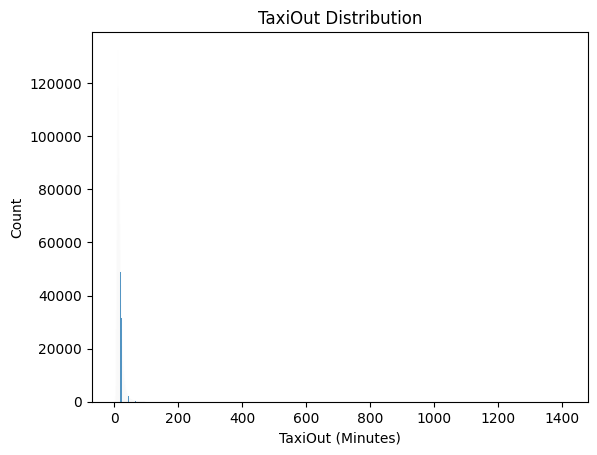

In [ ]:
sns.histplot(data=df , x='TaxiOut', color='tab:blue');
# set the title and labels
plt.title('TaxiOut Distribution');
plt.xlabel('TaxiOut (Minutes)');
plt.ylabel('Count');
plt.show();

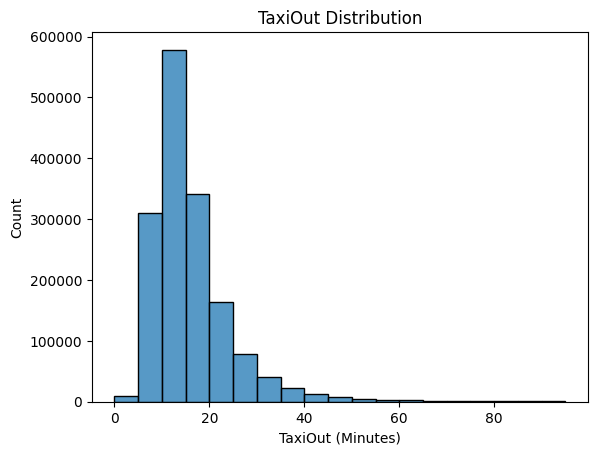

In [ ]:
# Set bins to 100 to see more information about the distribution
bins = np.arange(0,100,5)
sns.histplot(data=df , x='TaxiOut', color='tab:blue',bins=bins);
# Set the title and labels
plt.title('TaxiOut Distribution');
plt.xlabel('TaxiOut (Minutes)');
plt.ylabel('Count');
# Save the figure
plt.savefig('Charts/TaxiOut_Distribution.png');
plt.show();

This chart have values only between almost 0 , 100 so I setted bins to be between 0 to 100 and steps 5 to show more information to this chart, Also This distribution is right skewed that's mean mode < mean, that's also means mode will be less than 40 like we are seeing

#### I want to see top 10 Departure Time there are flights

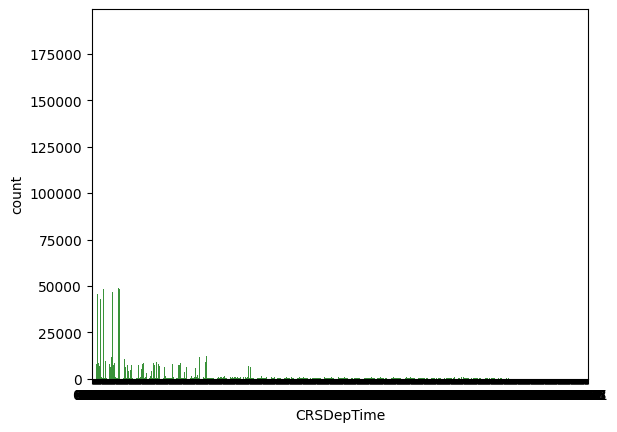

In [102]:
sns.countplot(data=df, x='CRSDepTime', color='tab:green');

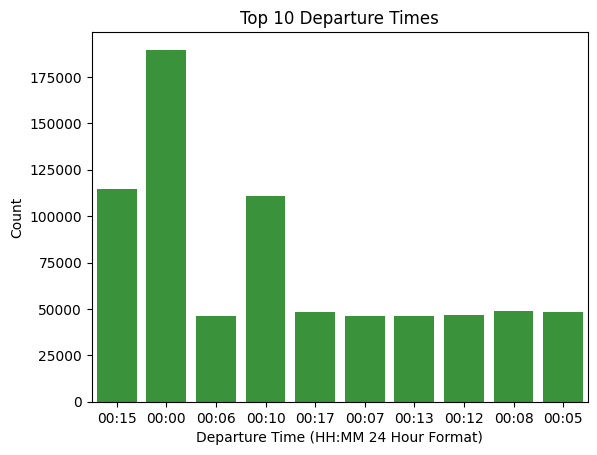

In [108]:
# filter the data to get the most 10 Departure Time there are flights in it
top_10_CRS_dep_time = df['CRSDepTime'].value_counts().head(10).index
# filter the data
filtered_df = df[df['CRSDepTime'].isin(top_10_CRS_dep_time)]
# plot the data
sns.countplot(data=filtered_df, x='CRSDepTime', color='tab:green');
# set the title and labels
plt.title('Top 10 Departure Times');
plt.xlabel('Departure Time (HH:MM 24 Hour Format)');
plt.ylabel('Count');
# Save the figure
plt.savefig('Charts/Top_10_Departure_Times.png');
plt.show();

I limit all Departure time to the top 10 to avoid overplotting

### Discussing the distribution(s) of my variable(s) of interest. Were there any unusual points? Did I need to perform any transformations?

> Your answer here!

### Of the features my investigated, were there any unusual distributions? Did I perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did I do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).

> **Rubric Tip**: This part (Bivariate Exploration) should include at least one scatter plot, one box plot, and at least one clustered bar chart or heat map.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> **Rubric Requirement**: Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> **Rubric Requirement**: This part (Multivariate Exploration) should include at least one Facet Plot, and one Plot Matrix or Scatterplot with multiple encodings.

>**Rubric Requirement**: Think carefully about how you encode variables. Choose appropriate color schemes, markers, or even how Facets are chosen. Also, do not overplot or incorrectly plot ordinal data.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
> **Rubric Requirement**: You can write a summary of the main findings and reflect on the steps taken during the data exploration.

> **Rubric Requirement**: Create a list of summary findings to make it easy to review.

### Remove all **Rubric Requirement** text 
Remove all **Rubric Requirement** text mentioned above, as well the text below, before you convert this notebook to PDF/HTML.


>At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!



> I think we can convert this column to new variables and delete airline code from it

array(['Northwest Airlines Inc.', 'AirTran Airways Corporation',
       'Envoy Air', 'Delta Air Lines Inc.', 'US Airways Inc.',
       'Continental Air Lines Inc.', 'Endeavor Air Inc.',
       'Mesa Airlines Inc.', 'Southwest Airlines Co.',
       'American Airlines Inc.', 'SkyWest Airlines Inc.',
       'United Air Lines Inc.', 'Piedmont Aviation Inc.',
       'Alaska Airlines Inc.', 'ExpressJet Airlines LLC d/b/a aha!',
       'Republic Airline', 'PSA Airlines Inc.',
       'America West Airlines Inc. (Merged with US Airways 9/05. Stopped reporting 10/07.)',
       'Trans World Airways LLC', 'Independence Air', 'JetBlue Airways',
       'Hawaiian Airlines Inc.', 'ExpressJet Airlines Inc.',
       'Spirit Air Lines', 'Frontier Airlines Inc.',
       'Ukraine International Airlines', 'Eastern Air Lines Inc.',
       'Allegiant Air', 'Virgin America', 'ATA Airlines d/b/a ATA',
       'Aloha Air Cargo', 'Pan American World Airways (1)',
       'Midway Airlines Inc. (1)'], dtype=object)